In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [112]:
data1=pd.read_csv("data_prepocess.csv")
data1.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,diff
0,2,Brown,0.80,7.78,13,9,0,1,73.684028
1,1,White,0.72,14.19,13,9,0,2,1862.740972
2,1,White,0.62,17.82,0,1,0,2,755.770833
3,2,Black,0.50,11.06,18,4,0,1,52.401389
4,0,Red,0.92,29.56,0,7,1,2,501.554167


In [113]:
data1.describe(include='all')

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,diff
count,17357.000000,17357,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000
unique,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.883390,NaN,0.502296,27.435507,4.708014,4.468053,0.481477,1.633635,898.159872
std,0.770434,NaN,0.288456,13.032920,6.287516,3.563806,0.499671,0.539481,1123.928394
min,0.000000,NaN,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-75.290972
25%,0.000000,NaN,0.250000,16.150000,0.000000,1.000000,0.000000,1.000000,128.547917
50%,1.000000,NaN,0.500000,27.300000,0.000000,4.000000,0.000000,2.000000,398.547917
75%,1.000000,NaN,0.750000,38.900000,13.000000,9.000000,1.000000,2.000000,1122.627083


In [114]:
data1['condition'].value_counts()

1    6819
0    6281
2    4257
Name: condition, dtype: int64

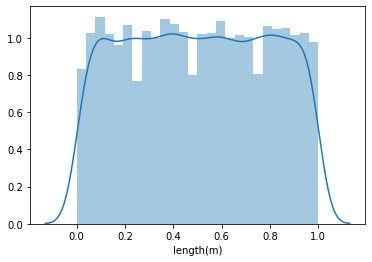

In [115]:
sns.distplot(data1['length(m)'])


In [116]:
data1 = data1.reset_index(drop=True)

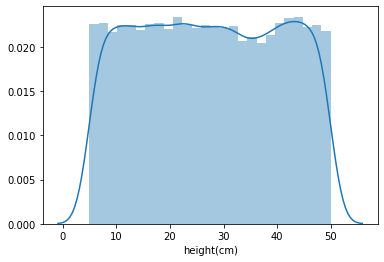

In [117]:
sns.distplot(data1["height(cm)"])

In [118]:
data1=data1.drop(["pet_id"],axis=1)

KeyError: "['pet_id'] not found in axis"

In [119]:
data1.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,diff
0,2,Brown,0.80,7.78,13,9,0,1,73.684028
1,1,White,0.72,14.19,13,9,0,2,1862.740972
2,1,White,0.62,17.82,0,1,0,2,755.770833
3,2,Black,0.50,11.06,18,4,0,1,52.401389
4,0,Red,0.92,29.56,0,7,1,2,501.554167


In [120]:
y=data1.loc[:,["breed_category","pet_category"]]
y.head()

,breed_category,pet_category
0,0,1
1,0,2
2,0,2
3,0,1
4,1,2


In [121]:
z=y["pet_category"]
y=y.drop(["breed_category"],axis=1)
z.value_counts()

2    10561
1     6601
4      158
0       37
Name: pet_category, dtype: int64

In [122]:
data1=data1.drop(["breed_category","pet_category"],axis=1)
y.shape

(17357, 1)

In [123]:
data1.columns.values

array(['condition', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2',
       'diff'], dtype=object)

In [124]:
data_with_dummies = pd.get_dummies(data1, columns=['condition', 'color_type'], drop_first=True)

In [125]:
data_with_dummies.head()

,length(m),height(cm),X1,X2,diff,condition_1,condition_2,color_type_Blue,color_type_Brown,color_type_Buff,...,color_type_Orange,color_type_Red,color_type_Sable,color_type_Tan,color_type_Torbie,color_type_Tortie,color_type_Tricolor,color_type_White,color_type_Yellow,color_type_rare
0,0.80,7.78,13,9,73.684028,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.72,14.19,13,9,1862.740972,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.62,17.82,0,1,755.770833,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.50,11.06,18,4,52.401389,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.92,29.56,0,7,501.554167,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [126]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_with_dummies,z, test_size=0.2, random_state=365)

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()   
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import f1_score 
import warnings
warnings.filterwarnings("ignore")

In [129]:
svm = SVC() 
svm.fit(x_train,y_train)
p = svm.predict(x_test)
SVM=metrics.accuracy_score(y_test, p)*100
print('Results using Support Vector Machine Classifier is')
print('Accuracy :',SVM)
print('Precision :',metrics.precision_score(y_test,p,average="weighted"))
print('Recall :',metrics.recall_score(y_test,p,average="weighted"))
print("f1 score:",f1_score(y_test,p,average="weighted"))

Results using Support Vector Machine Classifier is
Accuracy : 80.24193548387096
Precision : 0.7911377109174154
Recall : 0.8024193548387096
f1 score: 0.7955410714111862


In [130]:
from sklearn.metrics import confusion_matrix
result=confusion_matrix(y_test,p)
print(result)

[[   0    2    8    0]
 [   0  944  382    0]
 [   0  261 1842    0]
 [   0    5   28    0]]


In [131]:
clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(x_train,y_train)
pr = clf2.predict(x_test)
RF=metrics.accuracy_score(y_test, pr)*100
print('Results using Random Forest Classifier is')
print('Accuracy :',RF)
print('Precision :',metrics.precision_score(y_test,pr,average="weighted"))
print('Recall :',metrics.recall_score(y_test,pr,average="weighted"))
print("f1 score:",f1_score(y_test,pr,average="weighted"))

Results using Random Forest Classifier is
Accuracy : 84.30299539170507
Precision : 0.8436505160686912
Recall : 0.8430299539170507
f1 score: 0.8379002495730726


In [132]:
result1=confusion_matrix(y_test,pr)
print(result1)

[[   3    1    6    0]
 [   0 1025  301    0]
 [   1  204 1898    0]
 [   0    7   25    1]]


In [133]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
XGB=metrics.accuracy_score(y_test, y_pred)*100
print('Results using XGBoost Classifier is')
print('Accuracy :',XGB)
print('Precision :',metrics.precision_score(y_test,y_pred,average="weighted"))
print('Recall :',metrics.recall_score(y_test,y_pred,average="weighted"))
print("f1 score:",f1_score(y_test,p,average="weighted"))

Results using XGBoost Classifier is
Accuracy : 84.41820276497695
Precision : 0.841103898724365
Recall : 0.8441820276497696
f1 score: 0.7955410714111862


In [134]:
result2=confusion_matrix(y_test,y_pred)
print(result2)

[[   5    1    4    0]
 [   0 1009  316    1]
 [   1  186 1915    1]
 [   0    3   28    2]]


In [135]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(data_with_dummies,y, test_size=0.2, random_state=365)

In [136]:
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.fit_transform(x_test1)

In [137]:
svm = SVC() 
svm.fit(x_train1,y_train1)
p1 = svm.predict(x_test1)
SVM=metrics.accuracy_score(y_test1, p1)*100
print('Results using Support Vector Machine Classifier is')
print('Accuracy :',SVM)
print('Precision :',metrics.precision_score(y_test1,p1,average="weighted"))
print('Recall :',metrics.recall_score(y_test1,p1,average="weighted"))
print("f1 score:",f1_score(y_test1,p1,average="weighted"))


Results using Support Vector Machine Classifier is
Accuracy : 80.29953917050692
Precision : 0.791728437908537
Recall : 0.8029953917050692
f1 score: 0.7960858442613422


In [138]:
clf1 = RandomForestClassifier(c)
clf1.fit(x_train1,y_train1)
pr1= clf1.predict(x_test1)
RF=metrics.accuracy_score(y_test1, pr)*100
print('Results using Random Forest Classifier is')
print('Accuracy :',RF)
print('Precision :',metrics.precision_score(y_test,pr1,average="weighted"))
print('Recall :',metrics.recall_score(y_test,pr1,average="weighted"))
print("f1 score:",f1_score(y_test,pr1,average="weighted"))

Results using Random Forest Classifier is
Accuracy : 84.30299539170507
Precision : 0.8319785917225532
Recall : 0.8341013824884793
f1 score: 0.8297892574893144


In [139]:
model = XGBClassifier()
model.fit(x_train1, y_train1)
y_pred = model.predict(x_test1)
XGB=metrics.accuracy_score(y_test1, y_pred)*100
print('Results using XGBoost Classifier is')
print('Accuracy :',XGB)
print('Precision :',metrics.precision_score(y_test,y_pred,average="weighted"))
print('Recall :',metrics.recall_score(y_test,y_pred,average="weighted"))
print("f1 score:",f1_score(y_test,p,average="weighted"))

Results using XGBoost Classifier is
Accuracy : 83.52534562211981
Precision : 0.8366794611203975
Recall : 0.8352534562211982
f1 score: 0.7955410714111862


In [140]:
datanew=pd.read_csv("test.csv")
datanew.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [141]:
import pickle

In [142]:
with open('module', 'wb') as file:
    pickle.dump(clf, file)

In [143]:
with open('module', 'rb') as file:
    m = pickle.load(file)

In [193]:
data=pd.read_csv("test_preprocess.csv")

In [194]:
data.head()

,pet_id,condition,color_type,length(m),height(cm),X1,X2,diff
0,ANSL_75005,0,Black,0.87,42.73,0,7,4404.649306
1,ANSL_76663,1,Orange,0.06,6.71,0,1,174.725000
2,ANSL_58259,1,Black,0.24,41.21,0,7,1999.702083
3,ANSL_67171,1,Black,0.29,8.46,7,1,1148.309028
4,ANSL_72871,1,Brown,0.71,30.92,0,7,463.570833


In [201]:
ynew=data.pet_id

In [202]:
data2=data.drop(["pet_id"],axis=1)

In [203]:
data_with_dummies1 = pd.get_dummies(data2, columns=['condition', 'color_type'], drop_first=True)

In [204]:
data_with_dummies1.head()

,length(m),height(cm),X1,X2,diff,condition_1,condition_2,color_type_Blue,color_type_Brown,color_type_Buff,...,color_type_Orange,color_type_Red,color_type_Sable,color_type_Tan,color_type_Torbie,color_type_Tortie,color_type_Tricolor,color_type_White,color_type_Yellow,color_type_rare
0,0.87,42.73,0,7,4404.649306,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.06,6.71,0,1,174.725000,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.24,41.21,0,7,1999.702083,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.29,8.46,7,1,1148.309028,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.71,30.92,0,7,463.570833,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
pred1=clf2.predict(data_with_dummies1)
pred2=clf1.predict(data_with_dummies1)

In [207]:
from pandas import DataFrame
df=pd.DataFrame(data=ynew)
df['breed_category']=pred2
df['pet_category']=pred1

df.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1,2
1,ANSL_76663,1,2
2,ANSL_58259,1,2
3,ANSL_67171,1,1
4,ANSL_72871,1,1


In [208]:
df.to_csv("submissions.csv")